In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
data = pd.read_csv('https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_RapportINSPQ_HistoVigie.csv', skiprows = [1])

data.head()

,Date,Nb_Cas_Cumulatif,Nb_Nvx_Cas,Nb_Deces_Cumulatif_Total,Nb_Deces_Cumulatif_CHCHSLD,Nb_Deces_Cumulatif_RPA,Nb_Deces_Cumulatif_DomInc,Nb_Deces_Cumulatif_Autre,Nb_Nvx_Deces_Total,Nb_Nvx_Deces_CHCHSLD,Nb_Nvx_Deces_RPA,Nb_Nvx_Deces_DomInc,Nb_Nvx_Deces_Autre
0,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-27,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data_2020_2021 = data[data['Date'].dt.year < 2022]

In [51]:
data_march = data_2020_2021[(data_2020_2021['Date'].dt.month == 3) | (data_2020_2021['Date'].dt.month == 4)][['Date', 'Nb_Nvx_Cas']]

date1 = data_march[(data_march['Date'] >= '2020-03-19') & (data_march['Date'] <= '2020-04-15')]

In [52]:
date_september = data_2020_2021[(data_2020_2021['Date'].dt.month == 8) | (data_2020_2021['Date'].dt.month == 9)][['Date', 'Nb_Nvx_Cas']]

date2 = date_september[(date_september['Date'] >= '2020-08-31') & (date_september['Date'] <= '2020-09-28')]

In [53]:
date_december = data_2020_2021[((data_2020_2021['Date'].dt.month == 1) & (data_2020_2021['Date'].dt.year == 2021)) | ((data_2020_2021['Date'].dt.month == 12) & (data_2020_2021['Date'].dt.year == 2020))][['Date', 'Nb_Nvx_Cas']]

date3 = date_december[(date_december['Date'] >= '2020-12-25') & (date_december['Date'] <= '2021-01-22')]

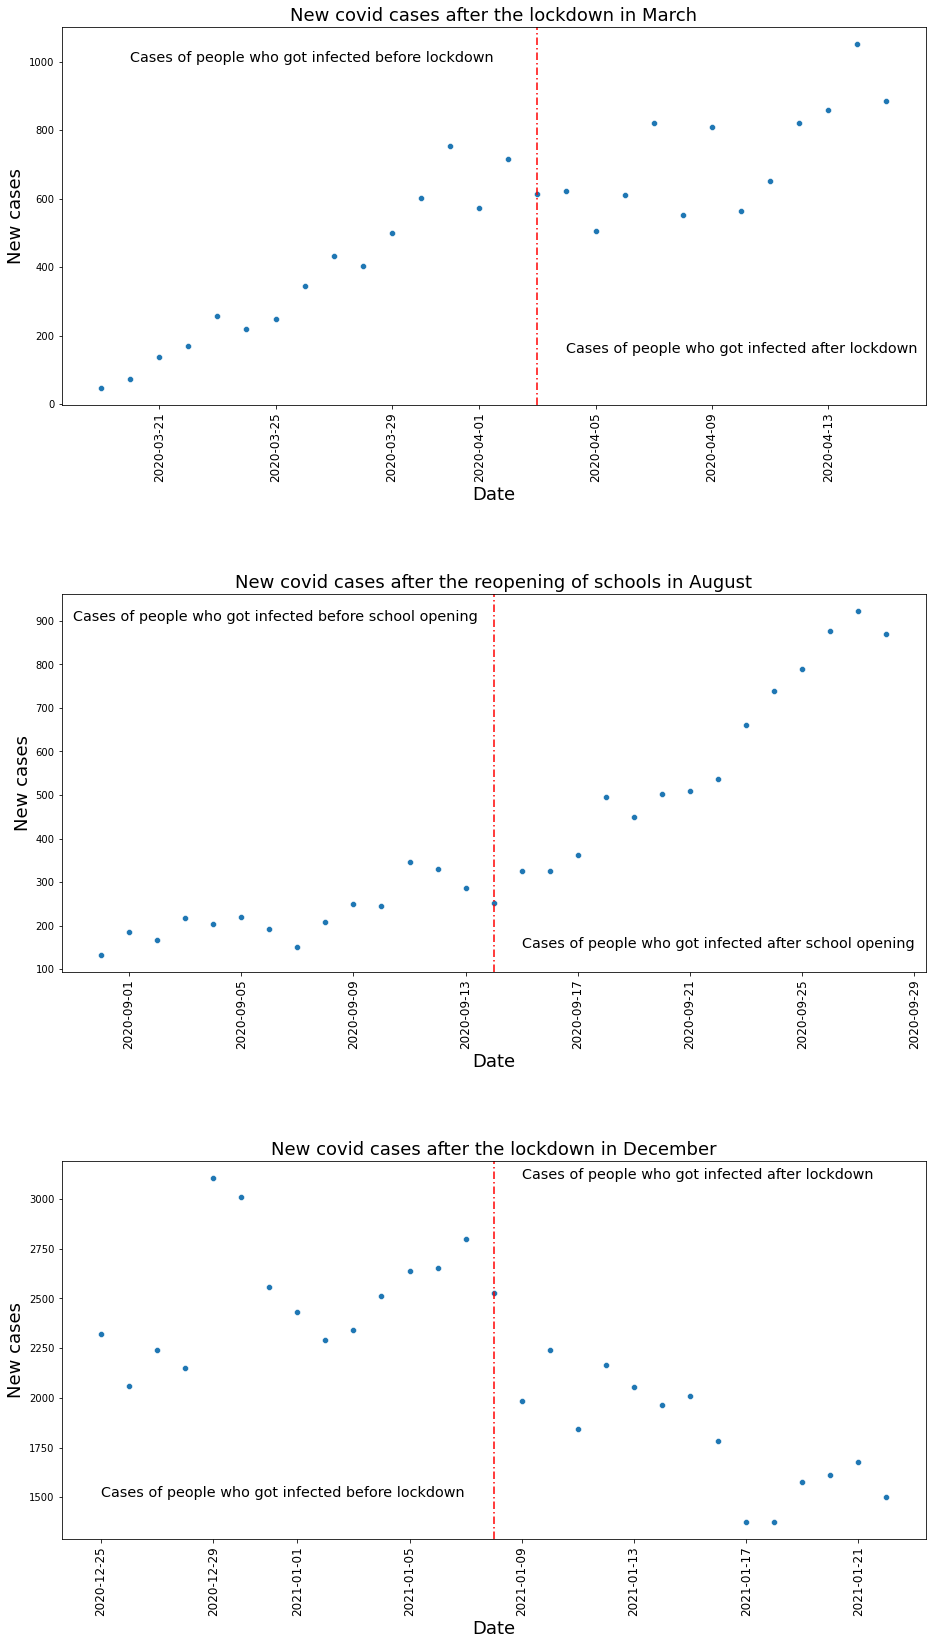

In [191]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=1,
                    hspace=0.5)


### Plot 1 

sns.scatterplot(data = date1, x = 'Date', y = 'Nb_Nvx_Cas', ax = ax[0])

ax[0].axvline(pd.to_datetime('2020-04-03'), color = 'red', dashes = (5, 2, 1, 2))

ax[0].set_title('New covid cases after the lockdown in March', fontsize = 18)

ax[0].set_ylabel('New cases', fontsize = 18)

ax[0].set_xlabel('Date', fontsize = 18)

ax[0].tick_params(axis='x', labelrotation = 90, labelsize = 'large')

ax[0].text(pd.to_datetime('2020-03-20'), y = 1000, s = 'Cases of people who got infected before lockdown', size = 'x-large')

ax[0].text(pd.to_datetime('2020-04-04'), y = 150, s = 'Cases of people who got infected after lockdown', size = 'x-large')


## Plot 2

sns.scatterplot(data = date2, x = 'Date', y = 'Nb_Nvx_Cas', ax = ax[1])

ax[1].axvline(pd.to_datetime('2020-09-14'), color = 'red', dashes = (5, 2, 1, 2))

ax[1].set_title('New covid cases after the reopening of schools in August', fontsize = 18)

ax[1].set_ylabel('New cases', fontsize = 18)

ax[1].set_xlabel('Date', fontsize = 18)

ax[1].tick_params(axis='x', labelrotation = 90, labelsize = 'large')

ax[1].text(pd.to_datetime('2020-08-30'), y = 900, s = 'Cases of people who got infected before school opening', size = 'x-large')

ax[1].text(pd.to_datetime('2020-09-15'), y = 150, s = 'Cases of people who got infected after school opening', size = 'x-large')


## Plot 3

sns.scatterplot(data = date3, x = 'Date', y = 'Nb_Nvx_Cas', ax = ax[2])

ax[2].axvline(pd.to_datetime('2021-01-08'), color = 'red', dashes = (5, 2, 1, 2))

ax[2].set_title('New covid cases after the lockdown in December', fontsize = 18)

ax[2].set_ylabel('New cases', fontsize = 18)

ax[2].set_xlabel('Date', fontsize = 18)

ax[2].tick_params(axis='x', labelrotation = 90, labelsize = 'large')

ax[2].text(pd.to_datetime('2020-12-25'), y = 1500, s = 'Cases of people who got infected before lockdown', size = 'x-large')

ax[2].text(pd.to_datetime('2021-01-09'), y = 3100, s = 'Cases of people who got infected after lockdown', size = 'x-large')


## Show Plots

plt.show()

